In [4]:
import numpy as np
import astroplan
from astroplan.plots import plot_sky
from astroplan import plots, Observer, FixedTarget
from astropy.coordinates import SkyCoord
from astropy.time import Time
import astropy
import astropy.units as u
from matplotlib import pyplot as plt
from astropy.table import Table
from matplotlib import cycler
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_moon
%matplotlib inline

In [5]:
astropy.__version__

'4.3.1'

In [6]:
#astroplan.download_IERS_A()
#astropy.utils.iers.IERS_A_URL = 'http://toshi.nofs.navy.mil/ser7/finals2000A.all'
astroplan.download_IERS_A()

In [7]:
custom_cycler=[]
colors=[]
colors = [icolor['color'] for icolor in plt.rcParams['axes.prop_cycle'] ]
custom_cycler = cycler(linestyle=['-', '--'])*cycler(color=colors)

In [8]:
observer = astroplan.Observer.at_site('keck')

In [9]:
#10:19 - 15:01
today = Time('2023-06-23 09:00:00', scale='utc')#10:24 - 15:20

In [10]:
pre_twi12deg = observer.sun_set_time(today, horizon=-12*u.degree)
print('12 deg env twilight', pre_twi12deg.iso)
pre_twi15deg = observer.sun_set_time(today, horizon=-15*u.degree)
print('15 deg env twilight', pre_twi15deg.iso)
pre_twi18deg = observer.twilight_evening_astronomical(today)
print('18 deg eve twilight', pre_twi18deg.iso)

twi18deg = observer.twilight_morning_astronomical(today)
print('18 deg morn twilight', twi18deg.iso)
twi15deg = observer.sun_rise_time(today, horizon=-15*u.degree)
print('15 deg morn twilight', twi15deg.iso)
twi12deg = observer.twilight_morning_nautical(today)
#twi12deg = Time('2019-12-22 16:00:30.559', scale='utc')
print('12 deg morn twilight', twi12deg.iso)



handoff = Time('2023-06-23 10:24:00', scale='utc')

12 deg env twilight 2023-06-23 05:57:39.703
15 deg env twilight 2023-06-23 06:12:37.204
18 deg eve twilight 2023-06-23 06:27:52.249
18 deg morn twilight 2023-06-23 14:20:22.079
15 deg morn twilight 2023-06-23 14:35:36.869
12 deg morn twilight 2023-06-23 14:50:34.055


In [11]:
gd71           =astroplan.FixedTarget(coord=SkyCoord('05:52:27.51', '+15:53:16.6', unit=(u.hourangle, u.degree)),
                                      name='gd71')
BD284211       =astroplan.FixedTarget(coord=SkyCoord('21:51:11.02',  '+28:51:50.4',unit=(u.hourangle, u.degree)),
                                      name='BD284211')#30 s	R~10.7	blue standard  (sdOp)
BD174708       =astroplan.FixedTarget(coord=SkyCoord('22:11:31.37',  '+18:05:34.2',unit=(u.hourangle, u.degree)),
                                      name='BD174708')#10 s	R~9.2	red standard
HD19445        =astroplan.FixedTarget(coord=SkyCoord('03:08:25.86',  '+26:20:05.7',unit=(u.hourangle, u.degree)),
                                      name='HD19445')#10 s	R~7.8	red standard
G191B2B        =astroplan.FixedTarget(coord=SkyCoord('05:05:30.60',  '+52:49:54.0',unit=(u.hourangle, u.degree)),
                                      name='G191B2B')#60 s	R~11.9	blue standard (DA0)
HD84937        =astroplan.FixedTarget(coord=SkyCoord('09:48:56.09',  '+13:44:39.3',unit=(u.hourangle, u.degree)),
                                      name='HD84937')#10 s	V~8.3	red standard
Feige34        =astroplan.FixedTarget(coord=SkyCoord('10:39:36.74',  '+43:06:09.3',unit=(u.hourangle, u.degree)),
                                      name='Feige34')#60 s	V~11.3	blue standard (DO)
HZ44           =astroplan.FixedTarget(coord=SkyCoord('13:23:35.26',  '+36:07:59.5',unit=(u.hourangle, u.degree)),
                                      name='HZ44')#60 s	V~11.7	blue standard
BD262606       =astroplan.FixedTarget(coord=SkyCoord('14:49:02.35',  '+25:42:09.1',unit=(u.hourangle, u.degree)),
                                      name='BD262606')#20 s	V~9.7	red standard
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)
Feige66       = astroplan.FixedTarget(coord=SkyCoord('12:37:23.6',  '+25:04:00',unit=(u.hourangle, u.degree)),
                                      name='Feige66')#	V~10.5	(sdO)

HZ4           = astroplan.FixedTarget(coord=SkyCoord('03:55:21.7','+09:47:18',unit=(u.hourangle, u.degree)),
                                      name='HZ4')#	DA4	14.52	3850	8850	1,3
PG0205134     = astroplan.FixedTarget(coord=SkyCoord('02:08:03.44', '+13:36:30.9',unit=(u.hourangle, u.degree)),
                                      name='PG0205134')#	sdOB	14.87	3200	8100	5

Feige11       = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

Hiltner600    = astroplan.FixedTarget(coord=SkyCoord('06:45:13.40', '+02:08:14.1',unit=(u.hourangle, u.degree)),
                                      name='Hiltner600')#	B1V	10.45	3200	10300	5, 6, 2
LTT9239         = astroplan.FixedTarget(coord=SkyCoord('22 52 40.88', '-20 35 26.3', unit=(u.hourangle, u.degree)),
                                      name='LTT9239')
LTT1020    = astroplan.FixedTarget(coord=SkyCoord('01:54:49.7', '-27:28:29', unit=(u.hourangle, u.degree)),
                                      name='LTT1020')#V~11.522 


In [12]:
stds = [gd71, BD284211, BD174708, HD19445, G191B2B, HD84937, Feige34, HZ44, BD262606, BD33d2642, 
        Feige110, Feige66, HZ4,PG0205134, Feige11, Hiltner600, LTT9239,LTT1020]

### Choose Standards for the night

/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

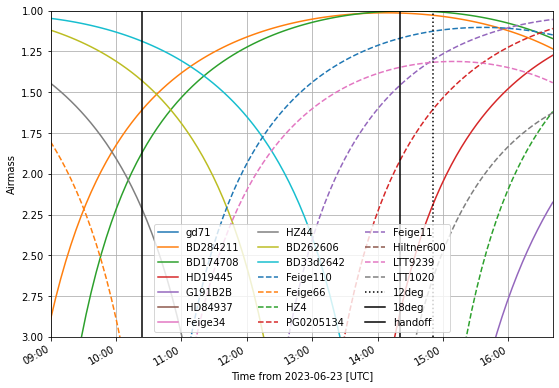

In [13]:
from astropy.utils.iers import conf
conf.auto_max_age = None
time = today+np.linspace(0, 0.32, 100)
plt.figure(figsize=(9,6))
for istd, istyle in zip(stds, custom_cycler):
    plots.plot_airmass(istd, observer, time, style_kwargs=istyle)
plt.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
plt.axvline(twi18deg.plot_date, label='18deg', color='k')
plt.axvline(handoff.plot_date, label='handoff', color='k')
plt.legend(ncol=3, loc='lower center')
plt.grid()

In [14]:
chosen_stds = [BD33d2642, Feige110]


In [18]:
sn2019uo    = astroplan.FixedTarget(coord=SkyCoord('12:02:36.56', '+41:03:42.3', unit=(u.hourangle, u.degree)),
                                  name='2019uo')
sn2017ivh    = astroplan.FixedTarget(coord=SkyCoord('13:39:36.25', '-11:28:55.9', unit=(u.hourangle, u.degree)),
                                  name='2017ivh')
sn2017ivv    = astroplan.FixedTarget(coord=SkyCoord('20:28:49.84', '-04:22:57.3', unit=(u.hourangle, u.degree)),
                                  name='2017ivv')
sn2018gj    = astroplan.FixedTarget(coord=SkyCoord('16:32:02.40', '+78:12:41.1', unit=(u.hourangle, u.degree)),
                                  name='2018gj')
sn2018aoq    = astroplan.FixedTarget(coord=SkyCoord('12:10:38.19', '+39:23:47.0', unit=(u.hourangle, u.degree)),
                                  name='2018aoq')
sn2018las    = astroplan.FixedTarget(coord=SkyCoord('10:59:52.23', '+19:47:41.8', unit=(u.hourangle, u.degree)),
                                  name='2018las')
sn2018aoz  = astroplan.FixedTarget(coord=SkyCoord('11:51:01.79', '-28:44:38.4', unit=(u.hourangle, u.degree)),
                                   name='2018aoz')
sn2018bsz = astroplan.FixedTarget(coord=SkyCoord('16:09:39.20', '-32:03:45.2', unit=(u.hourangle, u.degree)),
                                   name='2018bsz')
sn2018hmx = astroplan.FixedTarget(coord=SkyCoord('08:33:39.34', '+55:35:53.0', unit=(u.hourangle, u.degree)),
                                   name='2018hmx')
sn2018hna = astroplan.FixedTarget(coord=SkyCoord('12:26:12.05', '+58:18:51.1', unit=(u.hourangle, u.degree)),
                                   name='2018hna')
sn2018bwr = astroplan.FixedTarget(coord=SkyCoord('15:28:26.17', '+08:48:22.2', unit=(u.hourangle, u.degree)),
                                   name='2018bwr')
sn2017cjb = astroplan.FixedTarget(coord=SkyCoord('12:53:50.45', '+09:42:17.7', unit=(u.hourangle, u.degree)),
                                   name='2017cjb')
sn2018hhn = astroplan.FixedTarget(coord=SkyCoord('22:52:32.06', '+11:40:26.7', unit=(u.hourangle, u.degree)),
                                   name='2018hhn')
sn2018giu = astroplan.FixedTarget(coord=SkyCoord('20:27:49.22', '+09:54:51.9', unit=(u.hourangle, u.degree)),
                                   name='2018giu')
sn2018eog = astroplan.FixedTarget(coord=SkyCoord('20:28:12.03', '-03:08:11.2', unit=(u.hourangle, u.degree)),
                                   name='2018eog')
sn2019cxu = astroplan.FixedTarget(coord=SkyCoord('13:05:30.09', '-08:45:52.7', unit=(u.hourangle, u.degree)),
                                   name='2019cxu')


sn2022xus = astroplan.FixedTarget(coord=SkyCoord('06:54:05.13', '+08:34:13.5', unit=(u.hourangle, u.degree)),
                                   name='2022xus')
sn2022crv = astroplan.FixedTarget(coord=SkyCoord('09:54:25.82', '-25:42:10.5', unit=(u.hourangle, u.degree)),
                                   name='2022crv')
sn2022jox = astroplan.FixedTarget(coord=SkyCoord('09:57:44.49', '-28:30:56.5', unit=(u.hourangle, u.degree)),
                                   name='2022jox')
sn2022ewj = astroplan.FixedTarget(coord=SkyCoord('10:46:34.61', '+13:45:16.9', unit=(u.hourangle, u.degree)),
                                   name='2022ewj')
sn2022mma = astroplan.FixedTarget(coord=SkyCoord('14:39:01.50', '+15:59:11.8', unit=(u.hourangle, u.degree)),
                                   name='2022mma')
sn2022abq = astroplan.FixedTarget(coord=SkyCoord('13:22:56.79', '+28:19:09.6', unit=(u.hourangle, u.degree)),
                                   name='2022abq')
sn2022frq = astroplan.FixedTarget(coord=SkyCoord('13:27:56.91', '-13:24:59.2', unit=(u.hourangle, u.degree)),
                                   name='2022frq')
sn2022kad = astroplan.FixedTarget(coord=SkyCoord('14:58:43.32', '+11:37:50.9', unit=(u.hourangle, u.degree)),
                                   name='2022kad')
sn2022fuc = astroplan.FixedTarget(coord=SkyCoord('12:34:34.25', '+63:31:06.4', unit=(u.hourangle, u.degree)),
                                   name='2022fuc')
sn2023bee = astroplan.FixedTarget(coord=SkyCoord('08:56:11.63', '-03:19:32.0', unit=(u.hourangle, u.degree)),
                                   name='2023bee')
sn2023axu = astroplan.FixedTarget(coord=SkyCoord('06:45:55.32', '-18:13:53.5', unit=(u.hourangle, u.degree)),
                                   name='2023axu')    

sn2021ahpl =  astroplan.FixedTarget(coord=SkyCoord('15:15:57.94', '-19:17:32.0', unit=(u.hourangle, u.degree)),
                                   name='2021ahpl') 


sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022aaiq = astroplan.FixedTarget(coord=SkyCoord('14:26:32.03', '+56:35:03.2', unit=(u.hourangle, u.degree)),
                                   name='2022aaiq') 
sn2023cpt = astroplan.FixedTarget(coord=SkyCoord('15:21:33.36', '-13:05:21.7', unit=(u.hourangle, u.degree)),
                                   name='2023cpt') 

sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa') 
sn2022pul = astroplan.FixedTarget(coord=SkyCoord('12:26:48.86', '+08:26:55.3', unit=(u.hourangle, u.degree)),
                                   name='2022pul') 
sn2022qzr = astroplan.FixedTarget(coord=SkyCoord('00:09:55.01', '-05:01:16.1', unit=(u.hourangle, u.degree)),
                                   name='2022qzr') 
sn2023ktw = astroplan.FixedTarget(coord=SkyCoord('17:27:29.91', '+34:17:53.03', unit=(u.hourangle, u.degree)),
                                   name='2023ktw') 

In [19]:
targets = [sn2021ahpl, sn2022wsp, sn2022aaiq, sn2023cpt, sn2022esa, sn2022pul, sn2022qzr, sn2022mma, sn2023ktw]

/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

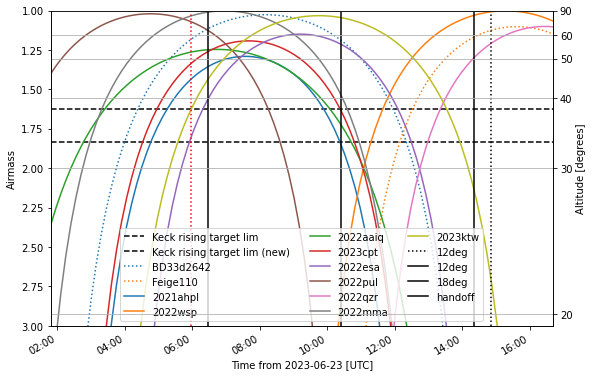

In [20]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim (new)')
time = today+np.linspace(-0.3, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility.pdf')

In [15]:

sn2021ahpl =  astroplan.FixedTarget(coord=SkyCoord('15:15:57.94', '-19:17:32.0', unit=(u.hourangle, u.degree)),
                                   name='2021ahpl') 
sn2022wsp = astroplan.FixedTarget(coord=SkyCoord('23:00:03.56', '+15:58:43.9', unit=(u.hourangle, u.degree)),
                                   name='2022wsp') 
sn2022aaiq = astroplan.FixedTarget(coord=SkyCoord('14:26:32.03', '+56:35:03.2', unit=(u.hourangle, u.degree)),
                                   name='2022aaiq') 
sn2023cpt = astroplan.FixedTarget(coord=SkyCoord('15:21:33.36', '-13:05:21.7', unit=(u.hourangle, u.degree)),
                                   name='2023cpt') 

sn2022esa = astroplan.FixedTarget(coord=SkyCoord('16:53:57.60', '-09:42:10.1', unit=(u.hourangle, u.degree)),
                                   name='2022esa') 
sn2022pul = astroplan.FixedTarget(coord=SkyCoord('12:26:48.86', '+08:26:55.3', unit=(u.hourangle, u.degree)),
                                   name='2022pul') 
sn2022qzr = astroplan.FixedTarget(coord=SkyCoord('00:09:55.01', '-05:01:16.1', unit=(u.hourangle, u.degree)),
                                   name='2022qzr') 
sn2023ktw = astroplan.FixedTarget(coord=SkyCoord('17:27:29.91', '+34:17:53.03', unit=(u.hourangle, u.degree)),
                                   name='2023ktw') 
BD33d2642      =astroplan.FixedTarget(coord=SkyCoord('15:51:59.86',  '+32:56:54.8',unit=(u.hourangle, u.degree)),
                                      name='BD33d2642')#30 s	V~10.81	(B2IV)
Feige110       =astroplan.FixedTarget(coord=SkyCoord('23:19:58.39',  '-05:09:55.8',unit=(u.hourangle, u.degree)),
                                      name='Feige110')#60 s	V~11.83	(DOp)

In [183]:
tab = """2022aaiq 14:26:32.03  +56:35:03.2 21 1x1200
BD33d2642 15:51:59.86  +32:56:54.8 10.81 1x30
2023ktw 17:27:29.91  +34:17:53.03 18.5 2x600
2022yjl 22:17:58.32  +10:59:43.1 22 2x1200
2022wsp 23:00:03.56  +15:58:43.9 19 3x1200
2022qzr 00:09:55.01  -05:01:16.1 22 3x1200
Feige110 23:19:58.39  -05:09:55.8 11.83 1x60
end     00:00:00     -90:00:00.  99 1x1 """
#2023cpt 15:21:33.36  -13:05:21.7  19.5 1x600
#2021ahpl 15:15:57.94  -19:17:32.0 21 2x1200
#2023cpt 15:21:33.36  -13:05:21.7  19.5 1x600
#MIRA 00:00:00 -89:00:00 99 1x300
#2022esa 16:53:57.60  -09:42:10.1 19 2x600
#2022mma 14:39:01.50  +15:59:11.8 18-19 1x600
#2022frq 13:27:56.91  -13:24:59.2 21-22 2x1200
#2022abq 13:22:56.79  +28:19:09.6 21-22 3x1200
#2022kad 14:58:43.32  +11:37:50.9 21-22 2x1200
#HD19445 03:08:25.86  +26:20:05.7 7.8 1x10
#HD84937 09:48:56.09  +13:44:39.3 8.3 1x10
#2020jgl 09:28:58.43  -14:48:19.8 19 1x600
#2019eez 06:16:22.26  -21:21:35.7 23 3x1200
#2020jfo 12:21:50.48  +04:28:54.1 18 1x300
#2020hvf 11:21:26.45  +03:00:52.8 17 1x150
#2020uxz 01:24:06.87  +12:55:17.3 15 1x100
#placehold 04:00:54.33  +18:00:10.2 19.5 1x900
#2020tkx 18:40:09.00  +34:06:59.5 19.5 1x900
#PG0205134  02:08:03.44  +13:36:30.9 14.87  1x120
#2020cxd 17:26:29.26  +71:05:38.6  20  1x900
#end       23:19:58.39  -05:09:55.8  11.83  1x1
#2020nxt  22:37:36.24  +35:00:07.7  21.2   1x1250
#placehold  00:00:00  00:00:00   22        2x1250
#2019iex  23:51:03.61  +20:08:43.7  21.3   1x1250
#gd71     05:52:27.51  +15:53:16.6  13.03  1x90
#HZ4      03:55:21.7   +09:47:18    14.52 1x120
#HD19445  03:08:25.86  +26:20:05.7  7.8   1x10
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019hnl 23:43:10.24  -02:56:58.7  23     4x1200
#2019muj  02:26:18.55  -09:50:09.0  22     2x1200
#2019osl  04:38:54.33  +18:50:10.2  22.5   3x1200

In [184]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [185]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [186]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes12,bytes10,bytes10,float64,float64
2022aaiq,14:26:32.03,+56:35:03.2,21,1x1200,1.0,1200.0
BD33d2642,15:51:59.86,+32:56:54.8,10.81,1x30,1.0,30.0
2023ktw,17:27:29.91,+34:17:53.03,18.5,2x600,2.0,600.0
2022yjl,22:17:58.32,+10:59:43.1,22,2x1200,2.0,1200.0
2022wsp,23:00:03.56,+15:58:43.9,19,3x1200,3.0,1200.0
2022qzr,00:09:55.01,-05:01:16.1,22,3x1200,3.0,1200.0
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0


In [187]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)
    

In [188]:
tbdata['start'] = obs_start[:-1]

In [189]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes12,bytes10,bytes10,float64,float64,object
2022aaiq,14:26:32.03,+56:35:03.2,21,1x1200,1.0,1200.0,2023-06-23 10:24:00.000
BD33d2642,15:51:59.86,+32:56:54.8,10.81,1x30,1.0,30.0,2023-06-23 10:49:00.000
2023ktw,17:27:29.91,+34:17:53.03,18.5,2x600,2.0,600.0,2023-06-23 10:54:30.000
2022yjl,22:17:58.32,+10:59:43.1,22,2x1200,2.0,1200.0,2023-06-23 11:22:45.000
2022wsp,23:00:03.56,+15:58:43.9,19,3x1200,3.0,1200.0,2023-06-23 12:11:00.000
2022qzr,00:09:55.01,-05:01:16.1,22,3x1200,3.0,1200.0,2023-06-23 13:22:30.000
Feige110,23:19:58.39,-05:09:55.8,11.83,1x60,1.0,60.0,2023-06-23 14:34:00.000
end,00:00:00,-90:00:00.,99,1x1,1.0,1.0,2023-06-23 14:40:00.000


In [190]:
15+1250*2/60.+(195)/60.

59.916666666666664

In [191]:
tbdata.write('../plan.txt', format='ascii.fixed_width', overwrite=True)

/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
/Users/yize/anaconda3/lib/python3.7/site-packages/astroplan/plots/time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, 

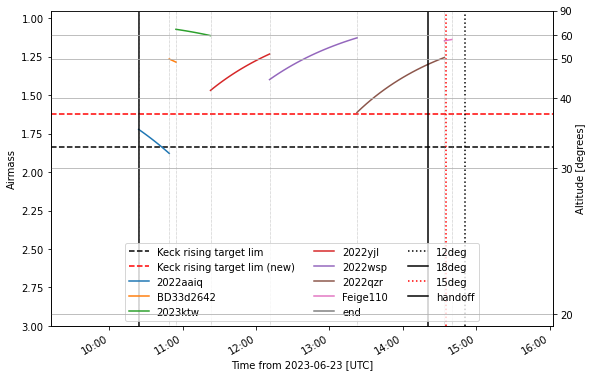

In [192]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
ax.axhline(1/np.cos(((90-38)*u.degree).to(u.radian)), color='r', ls='--', label='Keck rising target lim (new)')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule.pdf')

In [182]:
handoff

<Time object: scale='utc' format='iso' value=2023-06-23 10:24:00.000>

# Backup

In [ ]:
sn2020jgl = astroplan.FixedTarget(coord=SkyCoord('09:28:58.43', '-14:48:19.8', unit=(u.hourangle, u.degree)),
                                  name='2020jgl')
sn2020uxz = astroplan.FixedTarget(coord=SkyCoord('01:24:06.87', '+12:55:17.3', unit=(u.hourangle, u.degree)),
                                  name='2020uxz')
sn2020tkx = astroplan.FixedTarget(coord=SkyCoord('18:40:09.00', '+34:06:59.5', unit=(u.hourangle, u.degree)),
                                  name='2020tkx')
sn2020jfo = astroplan.FixedTarget(coord=SkyCoord('12:21:50.48', '+04:28:54.1', unit=(u.hourangle, u.degree)),
                                  name='2020jfo')
sn2020hvf = astroplan.FixedTarget(coord=SkyCoord('11:21:26.45', '+03:00:52.8', unit=(u.hourangle, u.degree)),
                                  name='2020hvf')
sn2019xdf = astroplan.FixedTarget(coord=SkyCoord('09:27:51.81', '+68:24:42.4', unit=(u.hourangle, u.degree)),
                                  name='2019xdf')
sn2019eez = astroplan.FixedTarget(coord=SkyCoord('06:16:22.26', '-21:21:35.7', unit=(u.hourangle, u.degree)),
                                  name='2019eez')
sn2015bh = astroplan.FixedTarget(coord=SkyCoord('09:09:35.09', '+33:07:21.4', unit=(u.hourangle, u.degree)),
                                  name='2015bh')
sn2020qmj = astroplan.FixedTarget(coord=SkyCoord('00:44:06.01', '+05:15:35.9', unit=(u.hourangle, u.degree)),
                                  name='2020qmj')
sn2019ust = astroplan.FixedTarget(coord=SkyCoord('00:54:22.42', '+31:40:12.6', unit=(u.hourangle, u.degree)),
                                  name='2019ust')
sn2020vg = astroplan.FixedTarget(coord=SkyCoord('11:48:54.44', '-04:40:53.9', unit=(u.hourangle, u.degree)),
                                  name='2020vg')

In [644]:
tab = """MIRA 00:00:00 -89:00:00 99 1x600
2020qmj 00:44:06.01  +05:15:35.9 20 3x1200
G191B2B 05:05:30.60  +52:49:54.0 11.9 1x60
2019ust 00:54:22.42  +31:40:12.6 22 3x1200
2020udy 02:06:49.34  +44:35:15.3 18 2x300
2019xdf 09:27:51.81  +68:24:42.4 22 3x1200
Feige34 10:39:36.74  +43:06:09.3 11.3 1x60
2020jgl 09:28:58.43  -14:48:19.8 19 2x600
2020hvf 11:21:26.45  +03:00:52.8 17 2x150
2020vg  11:48:54.44  -04:40:53.9 20 2x900
2020jfo 12:21:50.48  +04:28:54.1 18 2x300
Feige34 10:39:36.74  +43:06:09.3 11.3 1x60
end     00:00:00     -90:00:00.  99 1x1 """
#2020uxz 01:24:06.87  +12:55:17.3 16 2x100
#HD19445 03:08:25.86  +26:20:05.7 7.8 1x10
#HD84937 09:48:56.09  +13:44:39.3 8.3 1x10
#2020jgl 09:28:58.43  -14:48:19.8 19 1x600
#2019eez 06:16:22.26  -21:21:35.7 23 3x1200
#2020jfo 12:21:50.48  +04:28:54.1 18 1x300
#2020hvf 11:21:26.45  +03:00:52.8 17 1x150
#2020uxz 01:24:06.87  +12:55:17.3 15 1x100
#placehold 04:00:54.33  +18:00:10.2 19.5 1x900
#2020tkx 18:40:09.00  +34:06:59.5 19.5 1x900
#PG0205134  02:08:03.44  +13:36:30.9 14.87  1x120
#2020cxd 17:26:29.26  +71:05:38.6  20  1x900
#end       23:19:58.39  -05:09:55.8  11.83  1x1
#2020nxt  22:37:36.24  +35:00:07.7  21.2   1x1250
#placehold  00:00:00  00:00:00   22        2x1250
#2019iex  23:51:03.61  +20:08:43.7  21.3   1x1250
#gd71     05:52:27.51  +15:53:16.6  13.03  1x90
#HZ4      03:55:21.7   +09:47:18    14.52 1x120
#HD19445  03:08:25.86  +26:20:05.7  7.8   1x10
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019hnl 23:43:10.24  -02:56:58.7  23     4x1200
#2019muj  02:26:18.55  -09:50:09.0  22     2x1200
#2019osl  04:38:54.33  +18:50:10.2  22.5   3x1200

In [645]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [646]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [647]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
MIRA,00:00:00,-89:00:00,99,1x600,1.0,600.0
2020qmj,00:44:06.01,+05:15:35.9,20,3x1200,3.0,1200.0
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0
2019ust,00:54:22.42,+31:40:12.6,22,3x1200,3.0,1200.0
2020udy,02:06:49.34,+44:35:15.3,18,2x300,2.0,300.0
2019xdf,09:27:51.81,+68:24:42.4,22,3x1200,3.0,1200.0
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0
2020jgl,09:28:58.43,-14:48:19.8,19,2x600,2.0,600.0
2020hvf,11:21:26.45,+03:00:52.8,17,2x150,2.0,150.0


In [648]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [649]:
tbdata['start'] = obs_start[:-1]

In [650]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,object
MIRA,00:00:00,-89:00:00,99,1x600,1.0,600.0,2020-11-18 10:08:00.000
2020qmj,00:44:06.01,+05:15:35.9,20,3x1200,3.0,1200.0,2020-11-18 10:23:00.000
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0,2020-11-18 11:34:30.000
2019ust,00:54:22.42,+31:40:12.6,22,3x1200,3.0,1200.0,2020-11-18 11:40:30.000
2020udy,02:06:49.34,+44:35:15.3,18,2x300,2.0,300.0,2020-11-18 12:52:00.000
2019xdf,09:27:51.81,+68:24:42.4,22,3x1200,3.0,1200.0,2020-11-18 13:10:15.000
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0,2020-11-18 14:21:45.000
2020jgl,09:28:58.43,-14:48:19.8,19,2x600,2.0,600.0,2020-11-18 14:27:45.000
2020hvf,11:21:26.45,+03:00:52.8,17,2x150,2.0,150.0,2020-11-18 14:56:00.000


In [651]:
tbdata.write('../plan_backup.txt', format='ascii.fixed_width', overwrite=True)

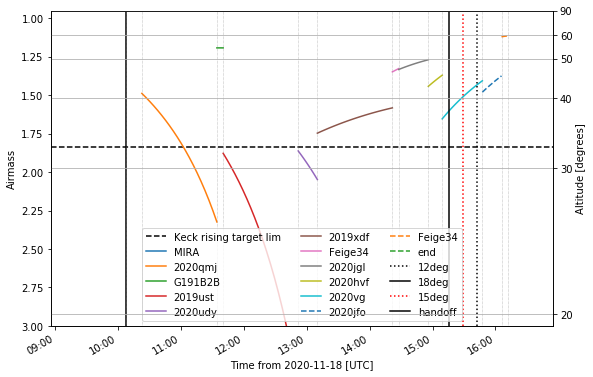

In [652]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_backup.pdf')

# HIRE

In [567]:
sn2020qmj = astroplan.FixedTarget(coord=SkyCoord('00:44:06.01', '+05:15:35.9', unit=(u.hourangle, u.degree)),
                                  name='2020qmj')
at2020zoq = astroplan.FixedTarget(coord=SkyCoord('10:36:21.54', '+13:43:08.9', unit=(u.hourangle, u.degree)),
                                  name='2020zoq')
sn2020uxz = astroplan.FixedTarget(coord=SkyCoord('01:24:06.87', '+12:55:17.3', unit=(u.hourangle, u.degree)),
                                  name='2020uxz')
at2016blu = astroplan.FixedTarget(coord=SkyCoord('12:35:52.16', '+27:55:56.0', unit=(u.hourangle, u.degree)),
                                  name='2016blu')
sn2020uem = astroplan.FixedTarget(coord=SkyCoord('08:24:23.850', '-03:29:19.10', unit=(u.hourangle, u.degree)),
                                  name='2020uem')

In [568]:
targets = [sn2020uxz, sn2020qmj, at2020zoq, at2016blu, sn2020uem]

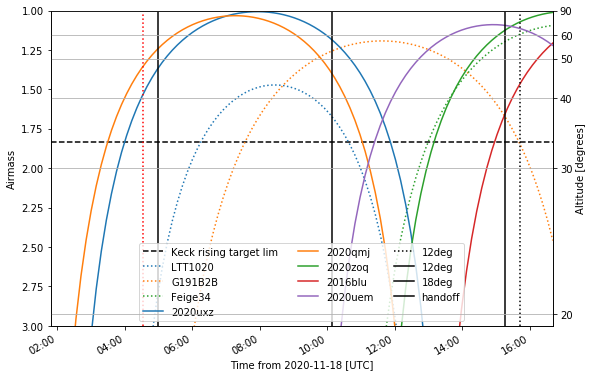

In [569]:
plt.close()
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
time = today+np.linspace(-0.3, 0.32, 100)
for std in chosen_stds:
    plots.plot_airmass(std, observer, time, style_kwargs={'linestyle':':'})

for cycle, itarget in zip(custom_cycler,targets):
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='12deg', color='k')
ax.axvline(pre_twi18deg.plot_date, label='18deg', color='k')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi12deg.plot_date, color='red', ls=':')
#plt.axhline()
ax.legend(ncol=3, loc='lower center')

plt.grid()
plt.savefig('visibility_HIRES.pdf')

In [ ]:
at2020zoq = astroplan.FixedTarget(coord=SkyCoord('10:36:21.54', '+13:43:08.9', unit=(u.hourangle, u.degree)),
                                  name='2020zoq')
sn2020uxz = astroplan.FixedTarget(coord=SkyCoord('01:24:06.87', '+12:55:17.3', unit=(u.hourangle, u.degree)),
                                  name='2020uxz')
at2016blu = astroplan.FixedTarget(coord=SkyCoord('12:35:52.16', '+27:55:56.0', unit=(u.hourangle, u.degree)),
                                  name='2016blu')
sn2020uem = astroplan.FixedTarget(coord=SkyCoord('08:24:23.850', '-03:29:19.10', unit=(u.hourangle, u.degree)),
                                  name='2020uem')
Feige11   = astroplan.FixedTarget(coord=SkyCoord('01:04:21.6', '+04:13:37',unit=(u.hourangle, u.degree)),
                                      name='Feige11')#	sdB	12.07	3850	8850	3

In [653]:
tab = """MIRA 00:00:00 -89:00:00 99 1x600
2020qmj 00:44:06.01  +05:15:35.9 19 3x1200
Feige11 01:04:21.6   +04:13:37   12 1x60
2020uxz 01:24:06.87  +12:55:17.3 15 2x900 
G191B2B 05:05:30.60  +52:49:54.0 11.9 1x60
2020uem 08:24:23.85  -03:29:19.1 16.8 3x900
2020zoq 10:36:21.54  +13:43:08.9 17 3x900
Feige34 10:39:36.74  +43:06:09.3 11.3 1x60
2020hvf 11:21:26.45  +03:00:52.8 17 3x900
2016blu 12:35:52.16  +27:55:56.0 16.9 3x900
end     00:00:00     -90:00:00.  99 1x1 """
#2020jfo 12:21:50.48  +04:28:54.1 18 2x300
#2020uxz 01:24:06.87  +12:55:17.3 16 2x100
#HD19445 03:08:25.86  +26:20:05.7 7.8 1x10
#HD84937 09:48:56.09  +13:44:39.3 8.3 1x10
#2020jgl 09:28:58.43  -14:48:19.8 19 1x600
#2019eez 06:16:22.26  -21:21:35.7 23 3x1200
#2020jfo 12:21:50.48  +04:28:54.1 18 1x300
#2020hvf 11:21:26.45  +03:00:52.8 17 1x150
#2020uxz 01:24:06.87  +12:55:17.3 15 1x100
#placehold 04:00:54.33  +18:00:10.2 19.5 1x900
#2020tkx 18:40:09.00  +34:06:59.5 19.5 1x900
#PG0205134  02:08:03.44  +13:36:30.9 14.87  1x120
#2020cxd 17:26:29.26  +71:05:38.6  20  1x900
#end       23:19:58.39  -05:09:55.8  11.83  1x1
#2020nxt  22:37:36.24  +35:00:07.7  21.2   1x1250
#placehold  00:00:00  00:00:00   22        2x1250
#2019iex  23:51:03.61  +20:08:43.7  21.3   1x1250
#gd71     05:52:27.51  +15:53:16.6  13.03  1x90
#HZ4      03:55:21.7   +09:47:18    14.52 1x120
#HD19445  03:08:25.86  +26:20:05.7  7.8   1x10
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019tua  21:58:00.29  +24:15:56.9  19     1x600
#2019hnl 23:43:10.24  -02:56:58.7  23     4x1200
#2019muj  02:26:18.55  -09:50:09.0  22     2x1200
#2019osl  04:38:54.33  +18:50:10.2  22.5   3x1200

In [654]:
row_list = tab.split('\n')
tbdata = Table(names=['name', 'ra', 'dec', 'mag', 'exposure'], dtype=('S10', 'S11', 'S11', 'S10', 'S10'))
for irow in row_list:
    tbdata.add_row(irow.split())

In [655]:
nexp = []
exptime = []
for irow in tbdata:
    inexp, iexptime = irow['exposure'].split('x')
    nexp.append(float(inexp))
    exptime.append(float(iexptime))
tbdata['nexp'] = nexp
tbdata['exptime'] = exptime

In [656]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64
MIRA,00:00:00,-89:00:00,99,1x600,1.0,600.0
2020qmj,00:44:06.01,+05:15:35.9,19,3x1200,3.0,1200.0
Feige11,01:04:21.6,+04:13:37,12,1x60,1.0,60.0
2020uxz,01:24:06.87,+12:55:17.3,15,2x900,2.0,900.0
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0
2020uem,08:24:23.85,-03:29:19.1,16.8,3x900,3.0,900.0
2020zoq,10:36:21.54,+13:43:08.9,17,3x900,3.0,900.0
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0
2020hvf,11:21:26.45,+03:00:52.8,17,3x900,3.0,900.0


In [657]:
night_start = handoff
#night_start = Time(pre_twi15deg.iso)
readout_time = 195*u.second
slew = 300*u.second
obs_start = [night_start]
start_time = night_start
for irow in tbdata:
    start_time +=irow['exptime']*irow['nexp']*u.second+readout_time*(irow['nexp']-1) + slew
    obs_start.append(start_time)

In [658]:
tbdata['start'] = obs_start[:-1]

In [659]:
tbdata

name,ra,dec,mag,exposure,nexp,exptime,start
bytes10,bytes11,bytes11,bytes10,bytes10,float64,float64,object
MIRA,00:00:00,-89:00:00,99,1x600,1.0,600.0,2020-11-18 10:08:00.000
2020qmj,00:44:06.01,+05:15:35.9,19,3x1200,3.0,1200.0,2020-11-18 10:23:00.000
Feige11,01:04:21.6,+04:13:37,12,1x60,1.0,60.0,2020-11-18 11:34:30.000
2020uxz,01:24:06.87,+12:55:17.3,15,2x900,2.0,900.0,2020-11-18 11:40:30.000
G191B2B,05:05:30.60,+52:49:54.0,11.9,1x60,1.0,60.0,2020-11-18 12:18:45.000
2020uem,08:24:23.85,-03:29:19.1,16.8,3x900,3.0,900.0,2020-11-18 12:24:45.000
2020zoq,10:36:21.54,+13:43:08.9,17,3x900,3.0,900.0,2020-11-18 13:21:15.000
Feige34,10:39:36.74,+43:06:09.3,11.3,1x60,1.0,60.0,2020-11-18 14:17:45.000
2020hvf,11:21:26.45,+03:00:52.8,17,3x900,3.0,900.0,2020-11-18 14:23:45.000


In [660]:
tbdata.write('../plan_hires.txt', format='ascii.fixed_width', overwrite=True)

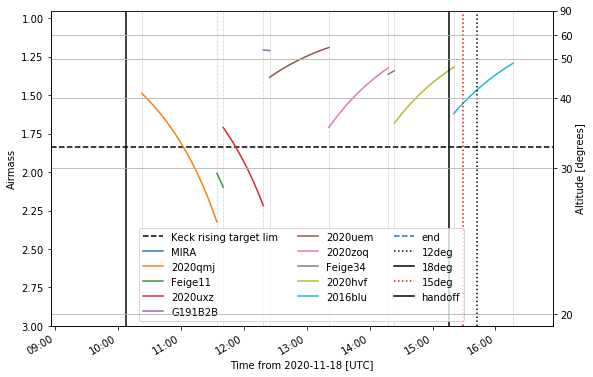

In [661]:
fig = plt.figure(figsize=(9,6))
fig.subplotpars.update(bottom=0.15)
ax = fig.add_subplot(111)
ax.axhline(1/np.cos(((90-33)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#ax.axhline(1/np.cos(((90-18)*u.degree).to(u.radian)), color='k', ls='--', label='Keck rising target lim')
#time = today+np.linspace(0, 0.32, 100)
last_time = handoff
for indx, cycle in enumerate(custom_cycler):
    try:
        irow = tbdata[indx]
    except IndexError:
        break
    itarget = astroplan.FixedTarget(coord=SkyCoord(ra=irow['ra'], dec=irow['dec'], unit=(u.hourangle, u.degree)), 
                                   name=irow['name'])
    try:
        time = irow['start'] + np.linspace(0,(tbdata[indx+1]['start']-irow['start']).value, 20)
    except IndexError:
        time = irow['start'] + np.linspace(0,(handoff-irow['start']).value, 20)
    plots.plot_airmass(itarget, observer, time, altitude_yaxis=True, ax=ax, style_kwargs=cycle)
ax.axvline(twi12deg.plot_date, linestyle=':', label='12deg', color='k')
ax.axvline(twi18deg.plot_date, label='18deg', color='k')
ax.axvline(twi15deg.plot_date, linestyle=':', label='15deg', color='red')
ax.axvline(handoff.plot_date, label='handoff', color='k')
ax.axvline(pre_twi18deg.plot_date, color='k', ls=':')
for start_time in tbdata['start']:
    ax.axvline(start_time.plot_date, color='gray', lw=0.5, ls=':')
ax.legend(ncol=3, loc='lower center')
#ax.set_xlim(pre_twi15deg.plot_date-0.05, handoff.plot_date+0.05)
ax.set_xlim(handoff.plot_date-0.05, twi12deg.plot_date+0.05)
ax.set_ylim(ymax=0.95)
plt.grid()
plt.savefig('schedule_hires.pdf')